In [125]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing

%matplotlib inline

In [126]:
np.random.seed(7)

### Loading data from csv file

In [127]:
df = pd.read_csv("loan_train.csv")

In [128]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [129]:
df.shape

(346, 10)

### Converting date time object

In [130]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


### Data visualization and preprocessing

In [131]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [132]:
import seaborn as sns

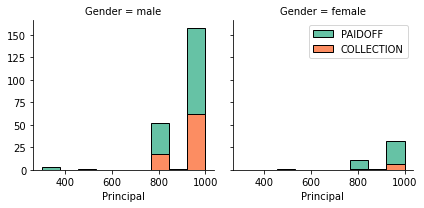

In [133]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col = "Gender", hue = "loan_status", palette = "Set2", col_wrap = 2)
g.map(plt.hist, 'Principal', bins = bins, ec = 'k')
g.axes[-1].legend()
plt.show()

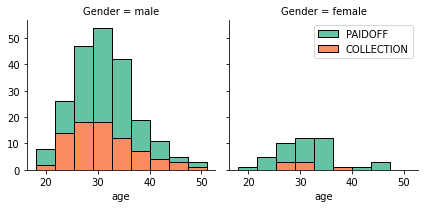

In [134]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col = "Gender", hue = "loan_status", palette = "Set2", col_wrap = 2)
g.map(plt.hist, 'age', bins = bins, ec = 'k')
g.axes[-1].legend()
plt.show()

### Preprocessing: Feature Selection / Extraction

<h5>Day of the week people get the loan</h5>

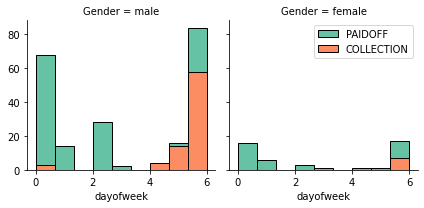

In [135]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col = "Gender", hue = "loan_status", palette = "Set2", col_wrap = 2)
g.map(plt.hist, 'dayofweek', bins = bins, ec = 'k')
g.axes[-1].legend()
plt.show()

<h5>Months people get loan</h5>

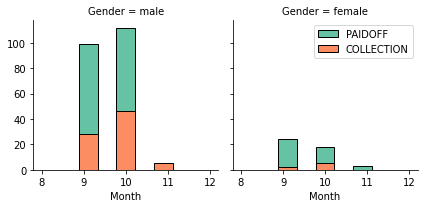

In [136]:
df['Month'] = df.due_date.dt.month
bins = np.linspace(df.Month.min() - 1, df.Month.max() + 1, 10)
g = sns.FacetGrid(df, col = "Gender", hue = "loan_status", palette = "Set2", col_wrap = 2)
g.map(plt.hist, 'Month', bins = bins, ec = 'k')
g.axes[-1].legend()
plt.show()

The above plots show that there is a higher possibility of loan repayment in the 9th month that 10th or 11th month

The plots also show that the people who get loans at the end of the week don't pay it off.

That's why we will set our threshold to the 4th day of the week.

In [137]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x > 3) else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,10,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,10,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,9,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,10,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,10,1


### Converting categorical features to numerical values

In [138]:
#analysis for gender
df.groupby(['Gender'])['loan_status'].value_counts(normalize = True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

The above analysis suggests that 86% of women pay their loan and only 73% men pay their loans

In [139]:
#lets convert male to 0 and female to 1
df['Gender'].replace(to_replace = ['male', 'female'], value = [0, 1], inplace = True)

In [140]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,10,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,10,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,9,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,10,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,10,1


In [141]:
df['deadline'] = df['due_date'] - df['effective_date']
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend,deadline
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,10,0,29 days
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,10,0,29 days
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,9,0,14 days
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,10,1,29 days
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,10,1,29 days


In [142]:
df['deadline'] = df['deadline'].dt.days
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend,deadline
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,10,0,29
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,10,0,29
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,9,0,14
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,10,1,29
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,10,1,29


based on the tested results, the columns for Month and deadline does not improve the result so we will not use them for feature sets of training

### OneHot Encoding

In [143]:
#lets analyse education
df.groupby(['education'])['loan_status'].value_counts(normalize = True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

The above analysis suggests that there are only 2 people with **Masters or Above Degree**

One of them has repayed the loan and other hasn't.

Therefore we choose to drop this category.

In [144]:
#lets check the length of this category
len(df[df.education == 'Master or Above'])

2

We will use the One Hot encoding technique to convert the categorical variables to binary variables and append them to feature Data Frame

In [145]:
Feature = df[['Principal', 'terms', 'age', 'Gender', 'weekend', 'dayofweek']]
Feature = pd.concat([Feature, pd.get_dummies(df['education'])], axis = 1)
Feature.drop(['Master or Above'], axis = 1, inplace = True)
Feature.head()

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,3,0,1,0
1,1000,30,33,1,0,3,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,1,4,0,0,1
4,1000,30,29,0,1,4,0,0,1


### Feature Selection

In [146]:
#Our data without label
x = Feature
x[0 : 5]

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,3,0,1,0
1,1000,30,33,1,0,3,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,1,4,0,0,1
4,1000,30,29,0,1,4,0,0,1


In [147]:
#Our labels
#We will encode our labels as 0 and 1
y = df['loan_status'].replace(to_replace = ['PAIDOFF', 'COLLECTION'], value = [0, 1]).values
y[0 : 5]

array([0, 0, 0, 0, 0], dtype=int64)

### Normalize Data

In [148]:
X = preprocessing.StandardScaler().fit_transform(x)
X[0 : 5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.26122054, -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
        -0.26122054,  2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.26122054, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
         0.12175534, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
         0.12175534, -0.38170062, -0.87997669,  1.14984679]])

In [149]:
#import scoring methods
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

In [150]:
#Our data for training
X_train, y_train = X, y

In [151]:
X_train.shape, y_train.shape

((346, 9), (346,))

In [152]:
#Creating a dictionary for keeping all the scores of the classifiers
trainScores = {}

### Implementing K Nearest Neighbours

In [153]:
from sklearn.neighbors import KNeighborsClassifier

bestScore = 0.0
accList = []

for k in range(3, 12):
    
    clf_knn = KNeighborsClassifier(n_neighbors = k, algorithm = 'auto')
    
    #using the 10 fold cross validation for scoring the classifier's accuracy
    scores = cross_val_score(clf_knn, X, y, cv = 10)
    score = scores.mean()
    accList.append(score)
    
    if score > bestScore:
        bestScore = score
        best_clf = clf_knn
        bestK = k

print("Best k is: ", bestK, "| Cross Validation Accuracy: ", bestScore)
clf_knn = best_clf

Best k is:  8 | Cross Validation Accuracy:  0.7522689075630252


In [154]:
clf_knn.fit(X_train, y_train)
y_pred = best_clf.predict(X_train)

In [155]:
trainScores['KNN-jaccard'] = jaccard_score(y_train, y_pred)
trainScores['KNN-f1-score'] = f1_score(y_train, y_pred, average = 'weighted')

In [156]:
trainScores

{'KNN-jaccard': 0.297029702970297, 'KNN-f1-score': 0.7701843558681992}

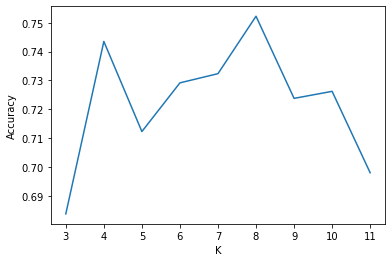

In [157]:
plt.plot(range(3, 12), accList)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

### Implementing Decision Tree